# Projekt IX: Wine Classification

Datasets consists of red variants of the Portuguese "Vinho Verde" wine. Given the nature of the dataset we can make both classification and regression tasks. I'll try to cluster the wine variants and predict wine quality

            key features: EDA, Clustering, Supervised Learning, Unsupervised Learning
            
#### Objectives:

   * EDA
   * Wine Quality Prediction
   * Wine Variants Clusterization

Target Feature: quality

#### Phases:
   * Data Preparation
   * Data Analysis
   * Supervised Learning
   * Unsupervised Learning



In [1]:
#lib imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import squarify
import pandas_profiling
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.gridspec import GridSpec

#SKLearn
from sklearn.metrics import classification_report, confusion_matrix, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

%matplotlib inline

In [2]:
#load dataset
df = pd.read_csv('data/winequality-red.csv')
df = df.sort_values(by = 'quality', ascending = False) #sort by quality descending

### Data Preparation

head, info, desc, null values, etc

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
495            10.7              0.35         0.53             2.6      0.070   
1403            7.2              0.33         0.33             1.7      0.061   
390             5.6              0.85         0.05             1.4      0.045   
1061            9.1              0.40         0.50             1.8      0.071   
1202            8.6              0.42         0.39             1.8      0.068   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
495                   5.0                  16.0  0.99720  3.15       0.65   
1403                  3.0                  13.0  0.99600  3.23       1.10   
390                  12.0                  88.0  0.99240  3.56       0.82   
1061                  7.0                  16.0  0.99462  3.21       0.69   
1202                  6.0                  12.0  0.99516  3.35       0.69   

      alcohol  quality  
495      11.0        8  
1403     10.0        8  
390      12.9        8  
1061     12.5        8  
1202     11.7        8

In [4]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 495 to 832
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [6]:
#NaN values visualization
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null values, all numerical, the dream dataset (cry emote)

### EDA

Text(0.5, 1.0, 'Correlation Matrix')

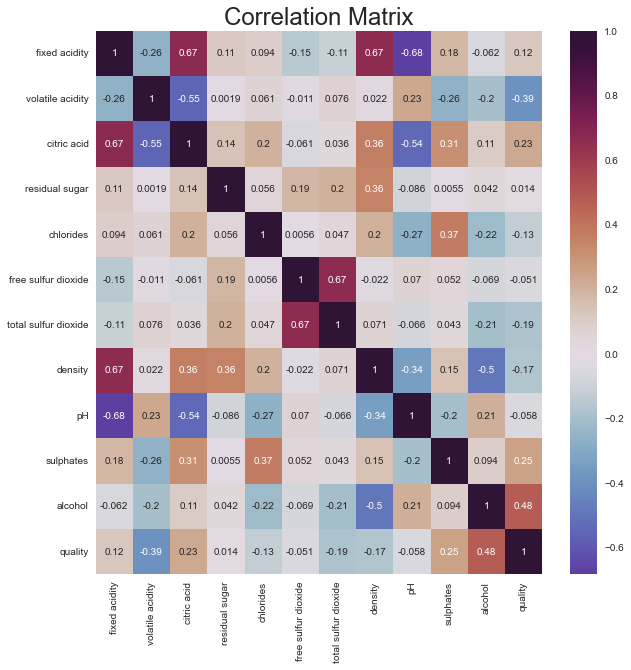

In [7]:
#correlation Matrix
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_corr, annot = True, center = 0, cmap = 'twilight_shifted')
ax.set_title('Correlation Matrix', fontsize = 24)

In [8]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

No big correlation with quality atribute

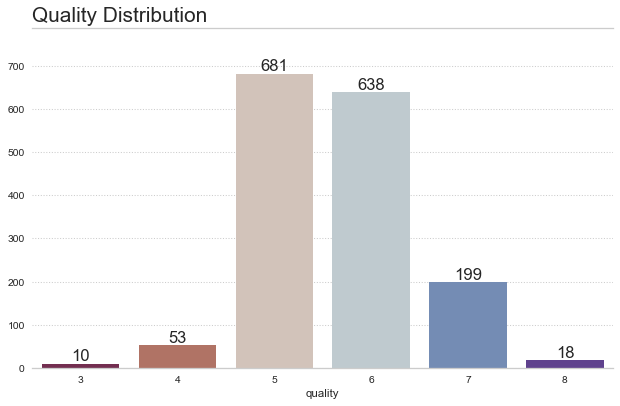

In [9]:
#Quality Distribution
df_count = df['quality'].value_counts().reset_index().sort_values(by = 'index', ascending = False).rename(columns={'quality':'Count','index':'Quality'})

#plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=75)
sns.countplot(data = df, x = 'quality', palette = 'twilight_shifted_r')

#title & axis
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.set_title('Quality Distribution',
             fontdict = {'fontsize': 20},
            loc = 'left')
ax.set_ylabel('')
ax.grid(axis = 'y',linestyle = 'dotted')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylim(0,ymax*1.1)

#xtick values
rate_list = list(range(0,6))
ticks = df_count.sort_values(by = 'Quality', ascending = True).reset_index()
for i in rate_list:
    ax.text(x = i, y = ticks['Count'][i],
            s = ticks['Count'][i],
            horizontalalignment= 'center', verticalalignment = 'bottom', 
            fontsize=16)

In [10]:
px.histogram(df,x = 'alcohol', title = 'Alcohol variation by Quality', color = 'quality')

In [11]:
px.histogram(df,x = 'volatile acidity', title = 'Volatile Acidity variation by Quality', color = 'quality')

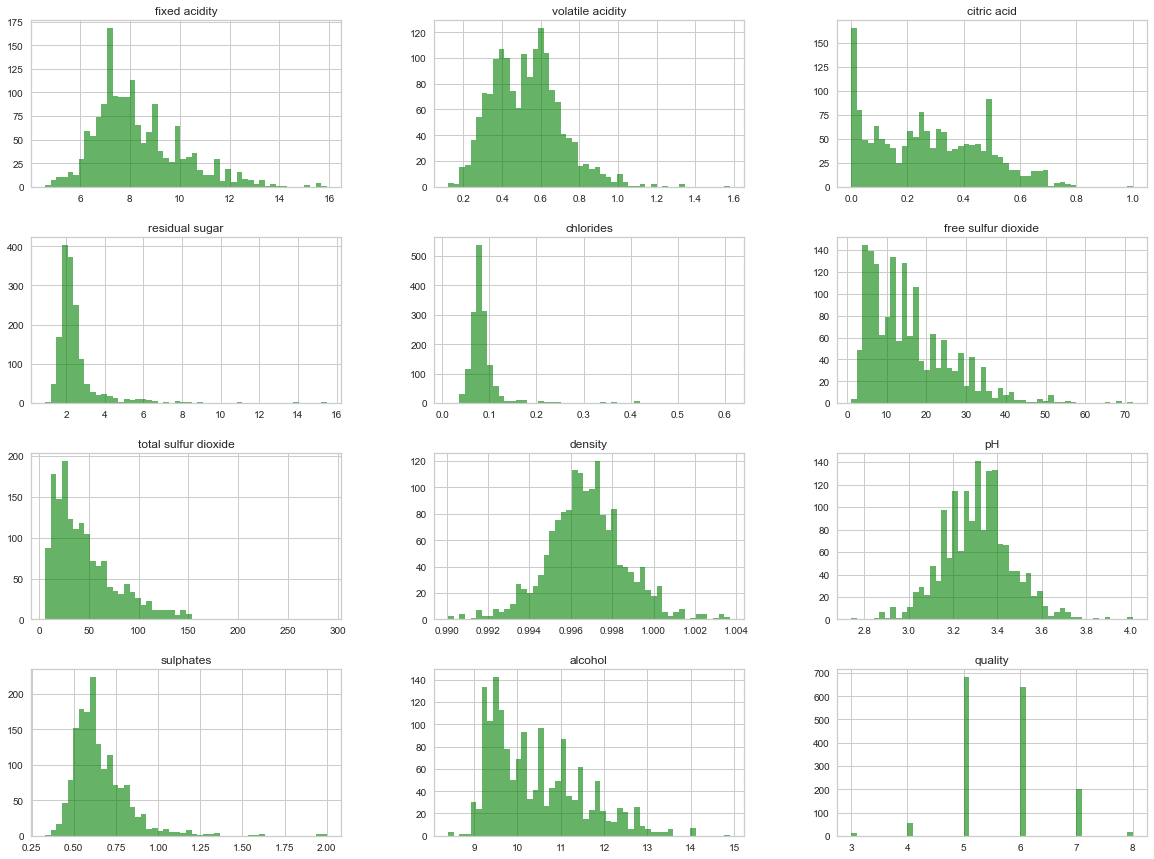

In [12]:
#all histograms
df.hist(bins=50, figsize=(20,15),color='green',alpha=0.6)
plt.show()

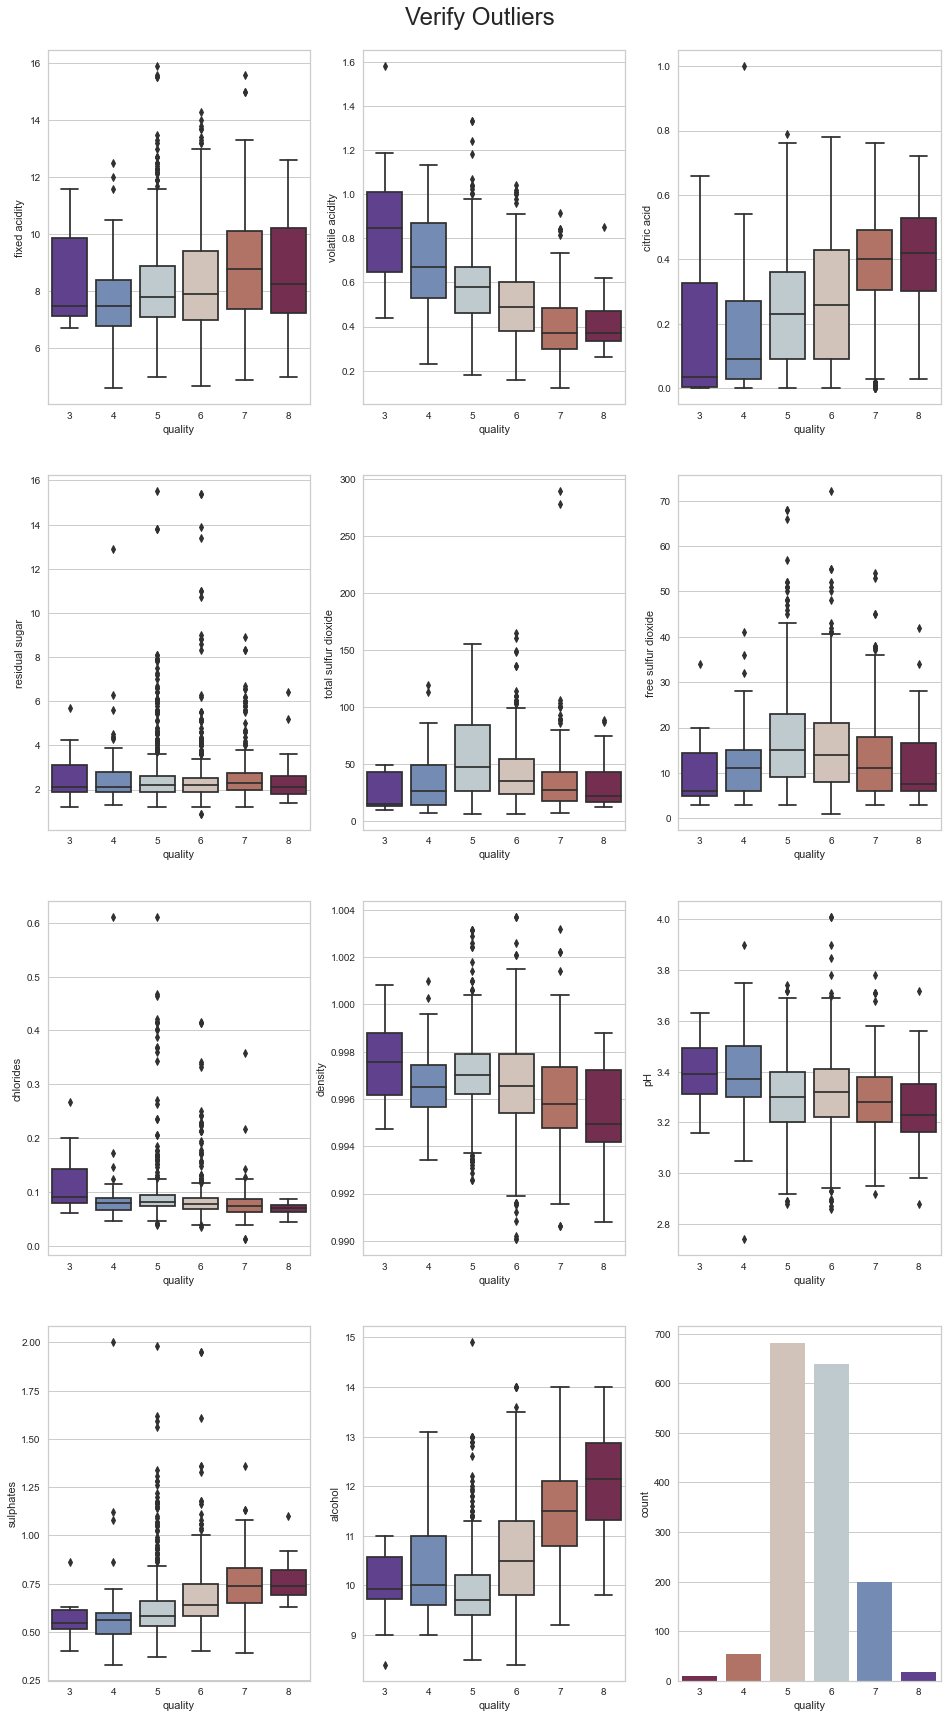

In [13]:
#verify outliers
fig, [(ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9), (ax10,ax11, ax12)] = plt.subplots(nrows = 4, ncols = 3, figsize = (16 , 30))
fig.suptitle('Verify Outliers', fontsize = 24,y = 0.9)

#first row
sns.boxplot(data = df, x = 'quality', y = 'fixed acidity', palette= 'twilight_shifted', ax = ax1)
sns.boxplot(data = df, x = 'quality', y = 'volatile acidity', palette= 'twilight_shifted', ax = ax2)
sns.boxplot(data = df, x = 'quality', y = 'citric acid', palette= 'twilight_shifted', ax = ax3)
#second row
sns.boxplot(data = df, x = 'quality', y = 'residual sugar', palette= 'twilight_shifted', ax = ax4)
sns.boxplot(data = df, x = 'quality', y = 'total sulfur dioxide', palette= 'twilight_shifted', ax = ax5)
sns.boxplot(data = df, x = 'quality', y = 'free sulfur dioxide', palette= 'twilight_shifted', ax = ax6)
#third row
sns.boxplot(data = df, x = 'quality', y = 'chlorides', palette= 'twilight_shifted', ax = ax7)
sns.boxplot(data = df, x = 'quality', y = 'density', palette= 'twilight_shifted', ax = ax8)
sns.boxplot(data = df, x = 'quality', y = 'pH', palette= 'twilight_shifted', ax = ax9)
#fourth row
sns.boxplot(data = df, x = 'quality', y = 'sulphates', palette= 'twilight_shifted', ax = ax10)
sns.boxplot(data = df, x = 'quality', y = 'alcohol', palette= 'twilight_shifted', ax = ax11)
sns.countplot(data = df, x = 'quality', palette = 'twilight_shifted_r', ax = ax12)

plt.show()

    Well, that is a really unhealthy number of outliers
    
Also, not our job here, but we can see a small correlation between quality and a small value of volatile acidity, moderate value of citric acid and high value of alcohol, with a good variation between 10% and 14%.

#### Data conclusion

After give a good looking at our data, we can define the follow:

* Huge number of outliers
* Some atributes are not normalized
* No atribute with big correlation with quality
* Unbalaced quantity gap between quality 5/6 wines to others

Now that we know our problems, here is what we'll have to do: 

* Normalize columns: [Residual Sugar; Chlorides; Free Sulphur Dioxide; Total Sulphur Dioxide; Sulphates]
* Oversample Quality [3; 4; 7; 8]
* Downsample Quality [5;6]

Ok, lets do it

#### Atribute Normalization

In [14]:
#make normalized df
df_normalized = df

def log_transform(col):
    return np.log(col[0])

df_normalized['residual sugar'] = df[['residual sugar']].apply(log_transform, axis=1)
df_normalized['chlorides'] = df[['chlorides']].apply(log_transform, axis=1)
df_normalized['free sulfur dioxide'] = df[['free sulfur dioxide']].apply(log_transform, axis=1)
df_normalized['total sulfur dioxide'] = df[['total sulfur dioxide']].apply(log_transform, axis=1)
df_normalized['sulphates'] = df[['sulphates']].apply(log_transform, axis=1)

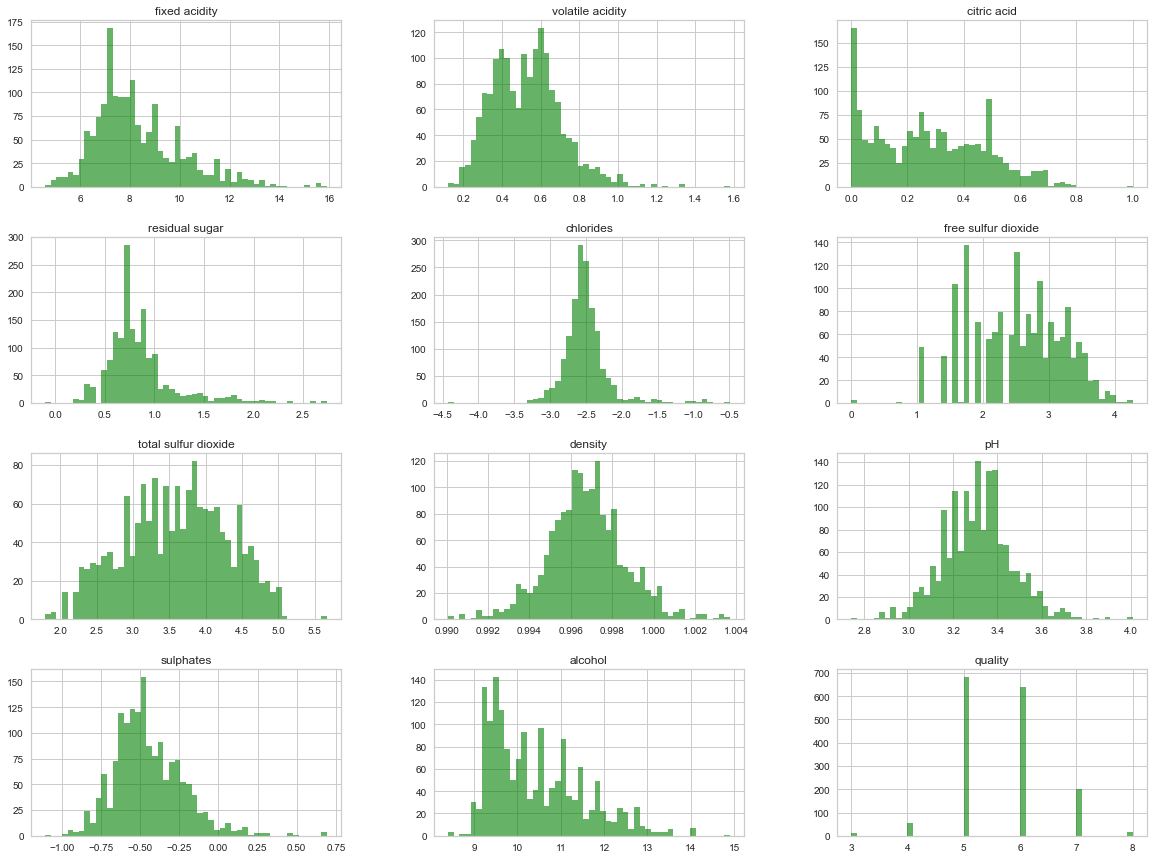

In [15]:
#all histograms
df_normalized.hist(bins=50, figsize=(20,15),color='green',alpha=0.6)
plt.show()

#### Oversample and Downsample

In [16]:
#create dfs
df_3 = df_normalized[df_normalized.quality==3]         
df_4 = df_normalized[df_normalized.quality==4]         
df_5 = df_normalized[df_normalized.quality==5]
df_6 = df_normalized[df_normalized.quality==6]
df_7 = df_normalized[df_normalized.quality==7]
df_8 = df_normalized[df_normalized.quality==8]

In [17]:
# oversample:
df_3_upsampled = resample(df_3, replace=True, n_samples=600, random_state=12) 
df_4_upsampled = resample(df_4, replace=True, n_samples=600, random_state=12) 
df_7_upsampled = resample(df_7, replace=True, n_samples=600, random_state=12) 
df_8_upsampled = resample(df_8, replace=True, n_samples=600, random_state=12) 

# downsample:
df_5_downsampled = df_normalized[df_normalized.quality==5].sample(n=600).reset_index(drop=True)
df_6_downsampled = df_normalized[df_normalized.quality==6].sample(n=600).reset_index(drop=True)

In [18]:
# Combine downsampled majority class with upsampled minority class
df_balance = pd.concat([df_3_upsampled, df_4_upsampled, df_7_upsampled, 
                         df_8_upsampled, df_5_downsampled, df_6_downsampled]).reset_index(drop=True)

# Display new class counts
df_balance.quality.value_counts()  

3    600
4    600
7    600
8    600
5    600
6    600
Name: quality, dtype: int64

### Supervised Learning

In [19]:
#train_test_split
X = df_balance.drop('quality',axis = 1,)
y = df_balance['quality']
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [20]:
#scalling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Logistic Regression

Accurracy Score: 59.33%
-----------------------------------
Classification Report: 

              precision    recall  f1-score   support

           3       0.71      0.90      0.80       145
           4       0.56      0.51      0.53       144
           5       0.60      0.53      0.57       176
           6       0.46      0.40      0.43       140
           7       0.48      0.42      0.45       141
           8       0.65      0.79      0.71       154

    accuracy                           0.59       900
   macro avg       0.58      0.59      0.58       900
weighted avg       0.58      0.59      0.58       900

----------------------------------- 
Confusion Matrix: 

AxesSubplot(0.125,0.125;0.62x0.755)


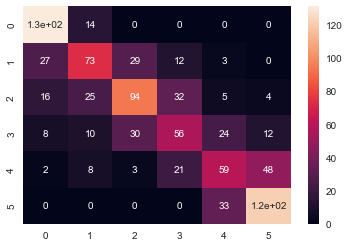

In [21]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
acc = round(accuracy_score(y_test, lr_pred)*100,2)
print("Accurracy Score: " + str(acc) + "%")
print('-----------------------------------')
print('Classification Report: \n\n' + classification_report(y_test,lr_pred, zero_division = True))
print('----------------------------------- \n' + 'Confusion Matrix: \n')
print(sns.heatmap(confusion_matrix(y_test,lr_pred), annot=True))

#### KNN

In [22]:
for n_neighbors in [3,5,10,15,20,30]:
    knn = KNeighborsClassifier(n_neighbors, weights='distance')
    knn.fit(X_train, y_train) 
    scr = knn.score(X_test, y_test)
    print("For n_neighbors = ", n_neighbors  ,", score: ",round(scr*100,2),'%')

For n_neighbors =  3 , score:  88.0 %
For n_neighbors =  5 , score:  87.78 %
For n_neighbors =  10 , score:  85.56 %
For n_neighbors =  15 , score:  85.44 %
For n_neighbors =  20 , score:  83.89 %
For n_neighbors =  30 , score:  83.44 %


Accurracy Score: 81.33%
-----------------------------------
Classification Report: 

              precision    recall  f1-score   support

           3       0.99      1.00      0.99       145
           4       0.80      1.00      0.89       144
           5       0.76      0.62      0.69       176
           6       0.59      0.49      0.53       140
           7       0.78      0.79      0.78       141
           8       0.91      1.00      0.95       154

    accuracy                           0.81       900
   macro avg       0.80      0.82      0.81       900
weighted avg       0.80      0.81      0.80       900

----------------------------------- 
Confusion Matrix: 

AxesSubplot(0.125,0.125;0.62x0.755)


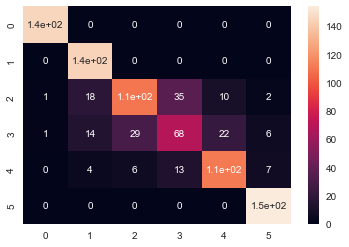

In [59]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_fit = knn.fit(X_train,y_train)
knn_pred = knn_fit.predict(X_test)
acc = round(accuracy_score(y_test, knn_pred)*100,2)
print("Accurracy Score: " + str(acc) + "%")
print('-----------------------------------')
print('Classification Report: \n\n' + classification_report(y_test,knn_pred, zero_division = True))
print('----------------------------------- \n' + 'Confusion Matrix: \n')
print(sns.heatmap(confusion_matrix(y_test,knn_pred), annot=True))

#### Decision Tree

Accurracy Score: 87.11%
-----------------------------------
Classification Report: 

              precision    recall  f1-score   support

           3       0.99      1.00      1.00       145
           4       0.97      1.00      0.98       144
           5       0.74      0.73      0.73       176
           6       0.63      0.51      0.56       140
           7       0.89      1.00      0.94       141
           8       0.98      1.00      0.99       154

    accuracy                           0.87       900
   macro avg       0.86      0.87      0.87       900
weighted avg       0.86      0.87      0.87       900

----------------------------------- 
Confusion Matrix: 

AxesSubplot(0.125,0.125;0.62x0.755)


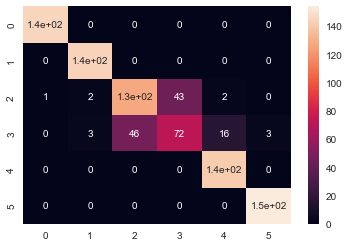

In [24]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
acc = round(accuracy_score(y_test, dtc_pred)*100,2)
print("Accurracy Score: " + str(acc) + "%")
print('-----------------------------------')
print('Classification Report: \n\n' + classification_report(y_test,dtc_pred, zero_division = True))
print('----------------------------------- \n' + 'Confusion Matrix: \n')
print(sns.heatmap(confusion_matrix(y_test,dtc_pred), annot=True))

### Unsupervised Learning

 #### Clustering


To make clustering works we'ill try to select the most significant features. This can be achieved through feature selection or dimensionality reduction:

 - Feature selection yields a subset of features from the original set of features, which are best representatives of the data. It is an exhaustive search.
 
 - Dimensionality reduction is generic and only depends on the data and not on what you plan to do with it.
 
Feature selection is good in classification problems because you select the features that will help you classify your data better. Since we just want to project the data into a lower dimensionality space, we'll go with dimension reduction using PCA.

In [25]:
#fit StandartScaling
scale = StandardScaler()
scale.fit(df)
scale_df = pd.DataFrame(scale.transform(df), columns = df.columns )
scale_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          1.367591         -0.993390     1.330102        0.294627  -0.470169   
1         -0.643266         -1.105120     0.303093       -0.894417  -0.890884   
2         -1.562514          1.799848    -1.134720       -1.437767  -1.820873   
3          0.448342         -0.714066     1.176051       -0.734458  -0.426806   
4          0.161077         -0.602337     0.611196       -0.734458  -0.558785   
...             ...               ...          ...             ...        ...   
1594      -0.528360          3.671318    -1.391472        1.669842   0.527088   
1595      -0.700719          1.939510    -1.134720        2.491340   0.013529   
1596      -0.011282          2.749549    -1.288771        1.045370   0.087197   
1597      -0.413454          5.877976    -1.391472       -0.303064   1.582595   
1598       1.195232         -0.490607     0.765247       -1.244689   1.756091   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -1.367283             -1.174369  0.240266 -1.043897   
1               -2.112929             -1.468821 -0.395750 -0.525555   
2               -0.089370              1.243122 -2.303799  1.612607   
3               -0.876138             -1.174369 -1.127169 -0.655141   
4               -1.101150             -1.582329 -0.840962  0.251958   
...                   ...                   ...       ...       ...   
1594            -1.367283             -1.363729 -0.077742  2.066156   
1595            -2.112929             -1.363729  0.706678  0.575922   
1596            -1.101150             -1.705719  1.151890  1.094265   
1597            -1.367283             -1.990289 -1.052967  1.223850   
1598             1.430829              0.383565  0.833882  0.446337   

      sulphates   alcohol   quality  
0      0.064774  0.541630  2.928190  
1      2.418694 -0.397043  2.928190  
2      1.104307  2.325108  2.928190  
3      0.331978  1.949639  2.928190  
4      0.331978  1.198701  2.928190  
...         ...       ...       ...  
1594  -0.764783  0.260028 -3.265165  
1595  -0.933646 -0.209308 -3.265165  
1596  -1.199527  0.541630 -3.265165  
1597  -2.107554  0.447763 -3.265165  
1598   1.317411 -0.490910 -3.265165  

[1599 rows x 12 columns]

In [26]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scale_df)
pca_df = pd.DataFrame(pca.transform(scale_df), columns=(["col1","col2", "col3"]))
pca_df.describe().T

count          mean       std       min       25%       50%       75%  \
col1  1599.0  5.276857e-17  1.785635 -5.632973 -1.305035 -0.180649  1.078914   
col2  1599.0 -9.609435e-16  1.536723 -4.114993 -1.120418 -0.175018  0.999343   
col3  1599.0 -4.756115e-17  1.321864 -4.355777 -0.903395 -0.072736  0.896887   

           max  
col1  6.629255  
col2  4.617204  
col3  4.665229

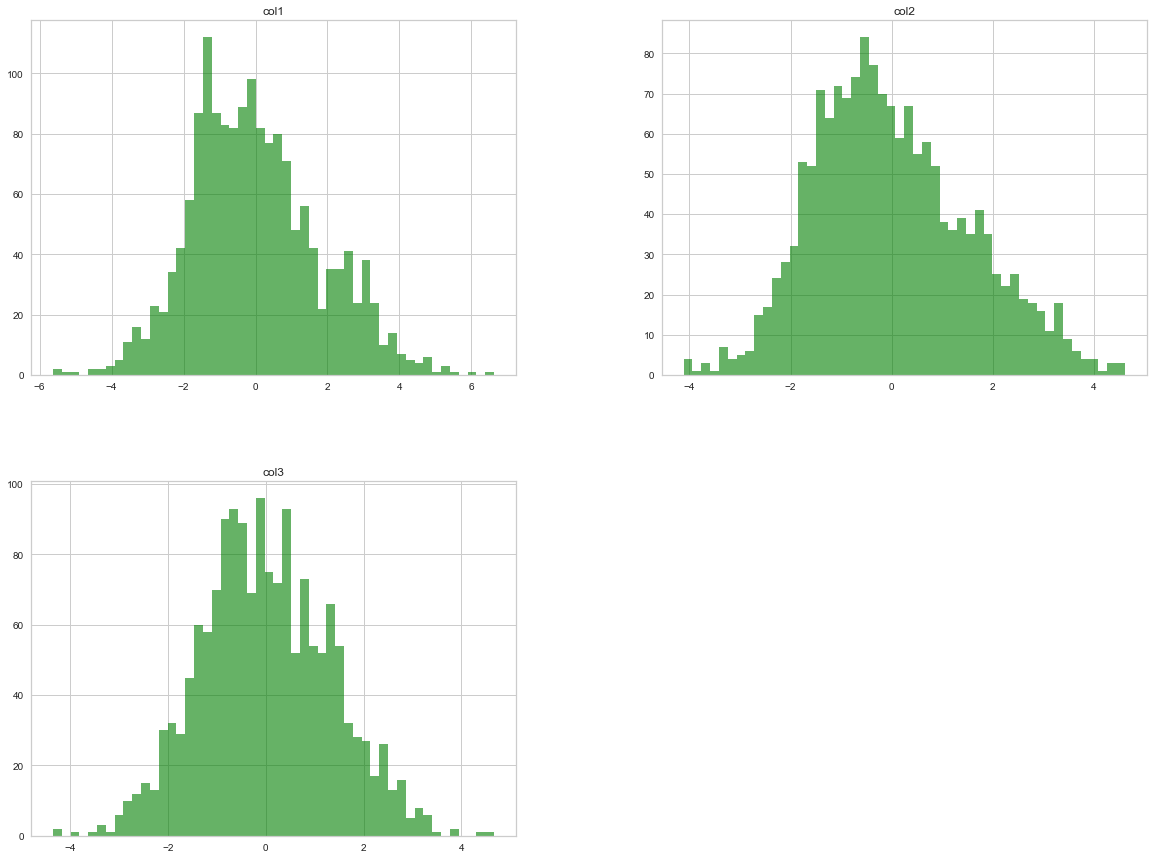

In [27]:
#pca histogram
pca_df.hist(bins=50, figsize=(20,15),color='green',alpha=0.6)
plt.show()

Looking good for now

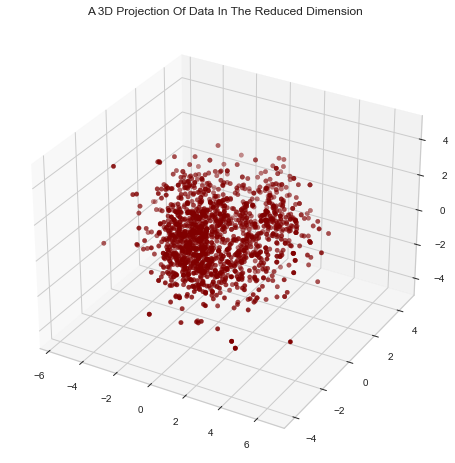

In [28]:
#create 3D graph
x = pca_df["col1"]
y = pca_df["col2"]
z = pca_df["col3"]

#plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [29]:
#Initiating the Agglomerative Clustering and Kmeans models
kmeans = KMeans()
AC = AgglomerativeClustering()

#### Aglomerative Clustering

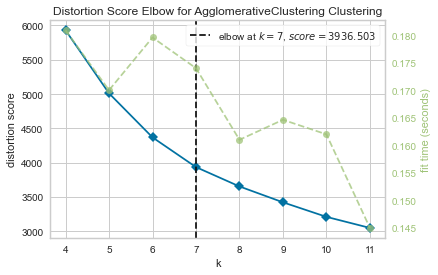

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
#use elbow method to define number of clusters on AC
visualizer = KElbowVisualizer(AC, k=(4,12))
visualizer.fit(pca_df)   # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [31]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=7)
# fit model and predict clusters
df_ac = AC.fit_predict(pca_df)
pca_df["ac_clusters"] = df_ac
#Adding the Clusters feature to the orignal and scaled dataframe.
df["ac_clusters"] = df_ac
scale_df["ac_clusters"] = df_ac

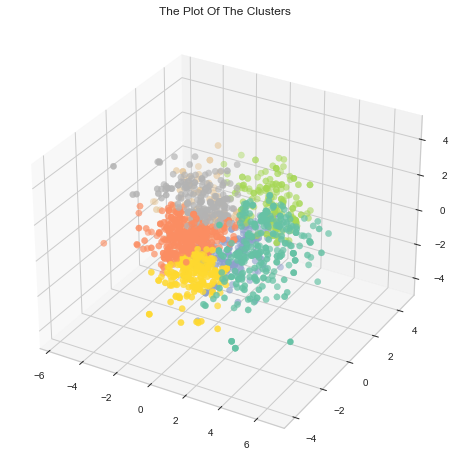

In [32]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c = pca_df["ac_clusters"], marker='o', cmap = 'Set2' )
ax.set_title("The Plot Of The Clusters")
plt.show()

#### Kmeans

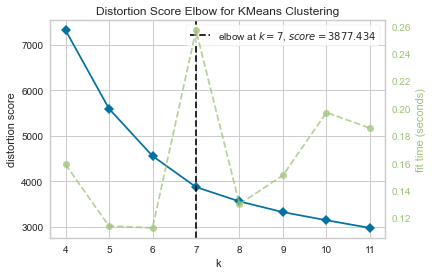

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
#use elbow method to define number of clusters on Kmeans
elbow = KElbowVisualizer(kmeans, k=(4,12))
elbow.fit(pca_df)   # Fit the data to the visualizer
elbow.show()        # Finalize and render the figure

Using elbow method we got an optimal cluster value of 7 fot both scenarios

In [34]:
#Initiating the kmeans model 
kmeans = KMeans(n_clusters = 7)
# fit model and predict clusters
df_kmeans = kmeans.fit_predict(pca_df)
pca_df["kmeans_clusters"] = df_kmeans
#Adding the Clusters feature to the orignal and scaled dataframe.
df["kmeans_clusters"] = df_kmeans
scale_df["kmeans_clusters"] = df_kmeans

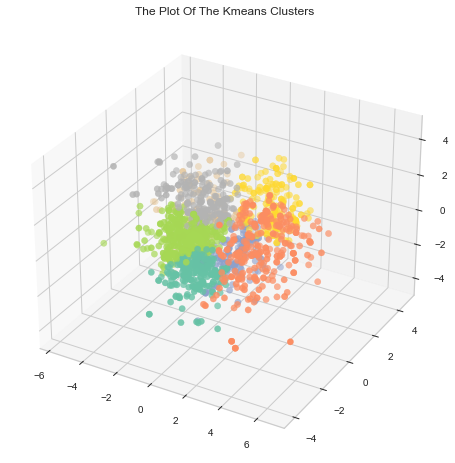

In [35]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c = pca_df["kmeans_clusters"], marker='o', cmap = 'Set2' )
ax.set_title("The Plot Of The Kmeans Clusters")
plt.show()

### Clustering Results

#### kmeans

In [36]:
#base color for graphs
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']

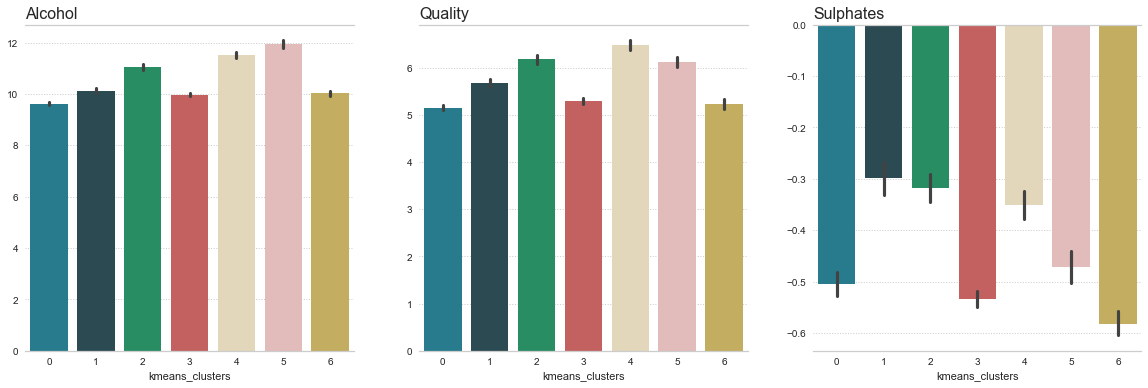

In [37]:
fig , (ax1 , ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20 , 6))

sns.barplot(data = df, x = 'kmeans_clusters', y = 'alcohol', ax = ax1, palette = colors_mix)
sns.barplot(data = df, x = 'kmeans_clusters', y = 'quality', ax = ax2, palette = colors_mix)
sns.barplot(data = df, x = 'kmeans_clusters', y = 'sulphates', ax = ax3, palette = colors_mix)

ax1.set_title('Alcohol', fontsize = 16, loc = 'left')
ax1.set_ylabel('')
ax1.grid(axis = 'y',linestyle = 'dotted')
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2.set_title('Quality', fontsize = 16, loc = 'left')
ax2.set_ylabel('')
ax2.grid(axis = 'y',linestyle = 'dotted')
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax3.set_title('Sulphates', fontsize = 16, loc = 'left')
ax3.set_ylabel('')
ax3.grid(axis = 'y',linestyle = 'dotted')
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

In [38]:
px.histogram(df.sort_values(by = 'kmeans_clusters', ascending = True),x = 'quality', title = 'Volatile Acidity variation by Quality', color = 'ac_clusters')

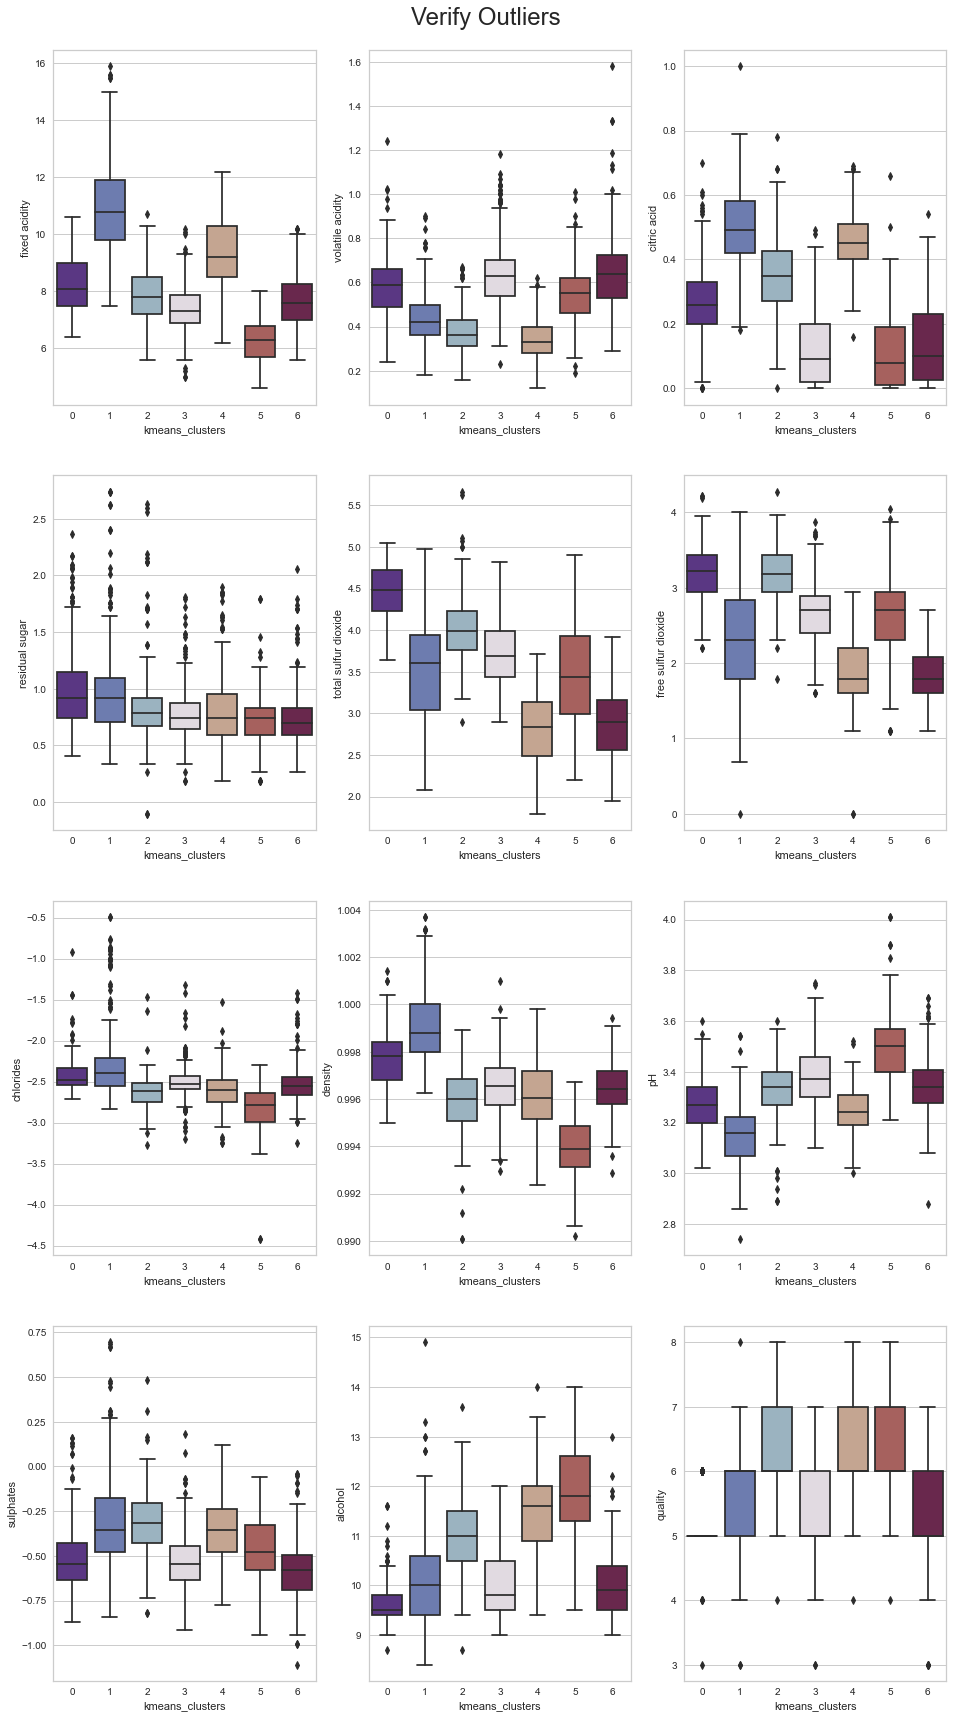

In [39]:
#verify outliers
fig, [(ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9), (ax10,ax11, ax12)] = plt.subplots(nrows = 4, ncols = 3, figsize = (16 , 30))
fig.suptitle('Verify Outliers', fontsize = 24,y = 0.9)

#first row
sns.boxplot(data = df, x = 'kmeans_clusters', y = 'fixed acidity', palette= 'twilight_shifted', ax = ax1)
sns.boxplot(data = df, x = 'kmeans_clusters', y = 'volatile acidity', palette= 'twilight_shifted', ax = ax2)
sns.boxplot(data = df, x = 'kmeans_clusters', y = 'citric acid', palette= 'twilight_shifted', ax = ax3)
#second row
sns.boxplot(data = df, x = 'kmeans_clusters', y = 'residual sugar', palette= 'twilight_shifted', ax = ax4)
sns.boxplot(data = df, x = 'kmeans_clusters', y = 'total sulfur dioxide', palette= 'twilight_shifted', ax = ax5)
sns.boxplot(data = df, x = 'kmeans_clusters', y = 'free sulfur dioxide', palette= 'twilight_shifted', ax = ax6)
#third row
sns.boxplot(data = df, x = 'kmeans_clusters', y = 'chlorides', palette= 'twilight_shifted', ax = ax7)
sns.boxplot(data = df, x = 'kmeans_clusters', y = 'density', palette= 'twilight_shifted', ax = ax8)
sns.boxplot(data = df, x = 'kmeans_clusters', y = 'pH', palette= 'twilight_shifted', ax = ax9)
#fourth row
sns.boxplot(data = df, x = 'kmeans_clusters', y = 'sulphates', palette= 'twilight_shifted', ax = ax10)
sns.boxplot(data = df, x = 'kmeans_clusters', y = 'alcohol', palette= 'twilight_shifted', ax = ax11)
sns.boxplot(data = df, x = 'kmeans_clusters', y = 'quality', palette= 'twilight_shifted', ax = ax12)

plt.show()

In [40]:
#Create df for polar plots
x = df.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_polar = pd.DataFrame(x_scaled, columns=df.columns)
df_polar['kmeans_clusters'] = df_kmeans
df_polar['ac_clusters'] = df_ac
df_polar['quality'] = df['quality']

In [41]:
#create dfs
df_kpolar = df_polar.groupby(by = 'kmeans_clusters').mean().transpose().reset_index().drop([11,12], axis = 0)

#make polar plot
px.line_polar(df_kpolar, 
              r=0, 
              theta='index', line_close=True, 
              range_r=(0,1),
              title='Cluster 0 Atributes',
              template = 'ggplot2')

In [42]:
#create df for quality polar graph
df_qpolar = df_polar.groupby('kmeans_clusters').mean().reset_index()
df_qpolar['kmeans_clusters'] = ['cluster 1','cluster 2','cluster 3','cluster 4','cluster 5','cluster 6','cluster 7']
#plot
px.line_polar(df_qpolar, 
              r='quality', 
              theta='kmeans_clusters', line_close=True, 
              range_r=(5.4,5.8),
              title='Quality',
              template = 'ggplot2')

In [43]:
#KMEANS PLOTS
fig = go.Figure()
cols = [0,1,2,3,4,5,6]
for i in cols:
    fig.add_trace(go.Scatterpolar(
      r=df_kpolar[i],
      theta=df_kpolar['index'],
      fill='toself',
      name='Cluster '+str(i)
))
fig.show()

In [44]:
fig = make_subplots(rows=4, cols=2, specs=[[{'type': 'polar'}]*2]*4)

fig.add_trace(go.Scatterpolar(
      r=df_kpolar[0],
      theta=df_kpolar['index'],
      fill='toself',
      name='Cluster 0'), 1, 1)
fig.add_trace(go.Scatterpolar(
      r=df_kpolar[1],
      theta=df_kpolar['index'],
      fill='toself',
      name='Cluster 1'), 1, 2)
fig.add_trace(go.Scatterpolar(
      r=df_kpolar[2],
      theta=df_kpolar['index'],
      fill='toself',
      name='Cluster 2'), 2, 1)
fig.add_trace(go.Scatterpolar(
      r=df_kpolar[3],
      theta=df_kpolar['index'],
      fill='toself',
      name='Cluster 3'), 2, 2)
fig.add_trace(go.Scatterpolar(
      r=df_kpolar[4],
      theta=df_kpolar['index'],
      fill='toself',
      name='Cluster 4'), 3, 1)
fig.add_trace(go.Scatterpolar(
      r=df_kpolar[5],
      theta=df_kpolar['index'],
      fill='toself',
      name='Cluster 5'), 3, 2)
fig.add_trace(go.Scatterpolar(
      r=df_kpolar[6],
      theta=df_kpolar['index'],
      fill='toself',
      name='Cluster 6'), 4, 1)
fig.add_trace(go.Scatterpolar(
      r=df_qpolar['quality'],
      theta=df_qpolar['kmeans_clusters'],
      fill='toself',
      name='Quality'), 4, 2)

fig.update_traces(fill='toself')

fig.show()

#### AC Clustering

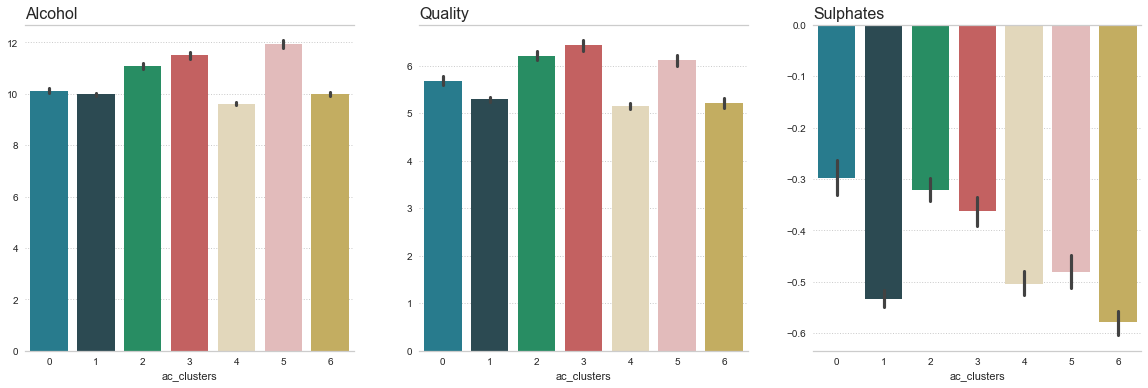

In [45]:
fig , (ax1 , ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20 , 6))

sns.barplot(data = df, x = 'ac_clusters', y = 'alcohol', ax = ax1, palette = colors_mix)
sns.barplot(data = df, x = 'ac_clusters', y = 'quality', ax = ax2, palette = colors_mix)
sns.barplot(data = df, x = 'ac_clusters', y = 'sulphates', ax = ax3, palette = colors_mix)

ax1.set_title('Alcohol', fontsize = 16, loc = 'left')
ax1.set_ylabel('')
ax1.grid(axis = 'y',linestyle = 'dotted')
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2.set_title('Quality', fontsize = 16, loc = 'left')
ax2.set_ylabel('')
ax2.grid(axis = 'y',linestyle = 'dotted')
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax3.set_title('Sulphates', fontsize = 16, loc = 'left')
ax3.set_ylabel('')
ax3.grid(axis = 'y',linestyle = 'dotted')
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

In [46]:
px.histogram(df.sort_values(by = 'ac_clusters', ascending = True),x = 'quality', title = 'Volatile Acidity variation by Quality', color = 'ac_clusters')

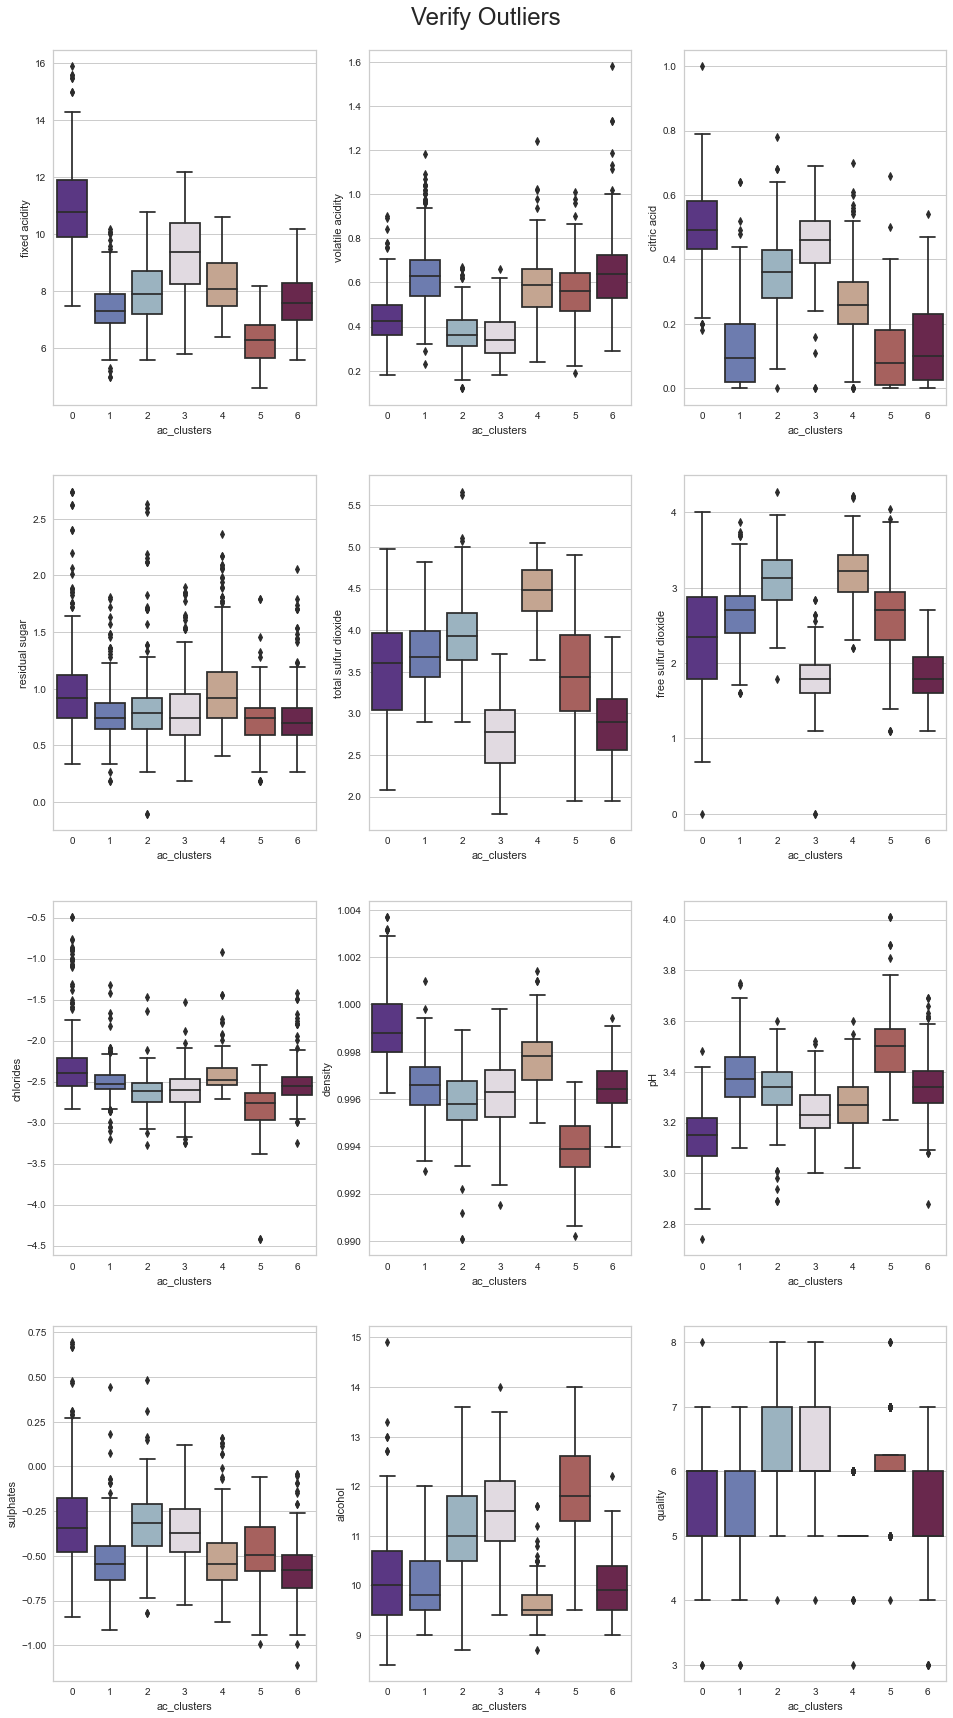

In [47]:
#verify outliers
fig, [(ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9), (ax10,ax11, ax12)] = plt.subplots(nrows = 4, ncols = 3, figsize = (16 , 30))
fig.suptitle('Verify Outliers', fontsize = 24,y = 0.9)

#first row
sns.boxplot(data = df, x = 'ac_clusters', y = 'fixed acidity', palette= 'twilight_shifted', ax = ax1)
sns.boxplot(data = df, x = 'ac_clusters', y = 'volatile acidity', palette= 'twilight_shifted', ax = ax2)
sns.boxplot(data = df, x = 'ac_clusters', y = 'citric acid', palette= 'twilight_shifted', ax = ax3)
#second row
sns.boxplot(data = df, x = 'ac_clusters', y = 'residual sugar', palette= 'twilight_shifted', ax = ax4)
sns.boxplot(data = df, x = 'ac_clusters', y = 'total sulfur dioxide', palette= 'twilight_shifted', ax = ax5)
sns.boxplot(data = df, x = 'ac_clusters', y = 'free sulfur dioxide', palette= 'twilight_shifted', ax = ax6)
#third row
sns.boxplot(data = df, x = 'ac_clusters', y = 'chlorides', palette= 'twilight_shifted', ax = ax7)
sns.boxplot(data = df, x = 'ac_clusters', y = 'density', palette= 'twilight_shifted', ax = ax8)
sns.boxplot(data = df, x = 'ac_clusters', y = 'pH', palette= 'twilight_shifted', ax = ax9)
#fourth row
sns.boxplot(data = df, x = 'ac_clusters', y = 'sulphates', palette= 'twilight_shifted', ax = ax10)
sns.boxplot(data = df, x = 'ac_clusters', y = 'alcohol', palette= 'twilight_shifted', ax = ax11)
sns.boxplot(data = df, x = 'ac_clusters', y = 'quality', palette= 'twilight_shifted', ax = ax12)

plt.show()

In [48]:
#create dfs
df_apolar = df_polar.groupby(by = 'ac_clusters').mean().transpose().reset_index().drop([11,12], axis = 0)

#make polar plot
px.line_polar(df_apolar, 
              r=0, 
              theta='index', line_close=True, 
              range_r=(0,1),
              title='Cluster 0 Atributes',
              template = 'ggplot2')

In [49]:
#create df for quality polar graph
df_q2polar = df_polar.groupby('ac_clusters').mean().reset_index()
df_q2polar['ac_clusters'] = ['cluster 0','cluster 1','cluster 2','cluster 3','cluster 4','cluster 5','cluster 6']
#plot
px.line_polar(df_q2polar, 
              r='quality', 
              theta='ac_clusters', line_close=True, 
              range_r=(5.4,5.8),
              title='Quality AC Clustering',
              template = 'ggplot2')

In [50]:
#AC PLOTS
fig = go.Figure()
cols = [0,1,2,3,4,5,6]
for i in cols:
    fig.add_trace(go.Scatterpolar(
      r=df_apolar[i],
      theta=df_apolar['index'],
      fill='toself',
      name='Cluster '+str(i)
))
fig.show()

In [51]:
fig = make_subplots(rows=4, cols=2, specs=[[{'type': 'polar'}]*2]*4)

fig.add_trace(go.Scatterpolar(
      r=df_kpolar[0],
      theta=df_apolar['index'],
      fill='toself',
      name='Cluster 0'), 1, 1)
fig.add_trace(go.Scatterpolar(
      r=df_apolar[1],
      theta=df_kpolar['index'],
      fill='toself',
      name='Cluster 1'), 1, 2)
fig.add_trace(go.Scatterpolar(
      r=df_apolar[2],
      theta=df_kpolar['index'],
      fill='toself',
      name='Cluster 2'), 2, 1)
fig.add_trace(go.Scatterpolar(
      r=df_apolar[3],
      theta=df_kpolar['index'],
      fill='toself',
      name='Cluster 3'), 2, 2)
fig.add_trace(go.Scatterpolar(
      r=df_apolar[4],
      theta=df_kpolar['index'],
      fill='toself',
      name='Cluster 4'), 3, 1)
fig.add_trace(go.Scatterpolar(
      r=df_apolar[5],
      theta=df_kpolar['index'],
      fill='toself',
      name='Cluster 5'), 3, 2)
fig.add_trace(go.Scatterpolar(
      r=df_apolar[6],
      theta=df_kpolar['index'],
      fill='toself',
      name='Cluster 6'), 4, 1)
fig.add_trace(go.Scatterpolar(
      r=df_q2polar['quality'],
      theta=df_q2polar['ac_clusters'],
      fill='toself',
      name='Quality'), 4, 2)

fig.update_traces(fill='toself')

fig.show()

 ### Conclusions

In [52]:
#AC PLOTS
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=df_qpolar['quality'],
      theta=df_qpolar['kmeans_clusters'],
      fill='toself',
      name='Quality KMeans'))

fig.add_trace(go.Scatterpolar(
      r=df_q2polar['quality'],
      theta=df_q2polar['ac_clusters'],
      fill='toself',
      name='Quality AC'))

fig.update_polars(radialaxis=dict(range=[5.4, 5.8]))
fig.show()

In [53]:
fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'polar'}]*3]*1)

fig.add_trace(go.Scatterpolar(
      r=df_kpolar[0],
      theta=df_apolar['index'],
      fill='toself',
      name='Cluster 0'), 1, 1)
fig.add_trace(go.Scatterpolar(
      r=df_apolar[1],
      theta=df_kpolar['index'],
      fill='toself',
      name='Cluster 1'), 1, 2)
fig.add_trace(go.Scatterpolar(
      r=df_apolar[2],
      theta=df_kpolar['index'],
      fill='toself',
      name='Cluster 2'), 1, 3)

In [54]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2]*1)

cols = [0,1,2,3,4,5,6]
for i in cols:
    fig.add_trace(go.Scatterpolar(
      r=df_kpolar[i],
      theta=df_kpolar['index'],
      fill='toself',
      name='Cluster '+str(i)),1,1)
    fig.add_trace(go.Scatterpolar(
      r=df_apolar[i],
      theta=df_apolar['index'],
      fill='toself',
      name='Cluster '+str(i)),1,2)
    
fig.update_traces(fill='toself')
fig.show()

Cluster 5 presented best result in both tests. They share minimum value at volatile acidity, a good indication in quality, and also a fair amount of alcohol.